In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time
from sklearn.model_selection import train_test_split
from tqdm import tqdm

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

In [2]:
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

# split original training data to sub-training (80%) and validation data (20%)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=13)


print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

4431872/4422102 [==============================] - 0s 0us/step
Train set:    48000 samples
Test set:     10000 samples
Sample dims:  (48000, 28, 28)


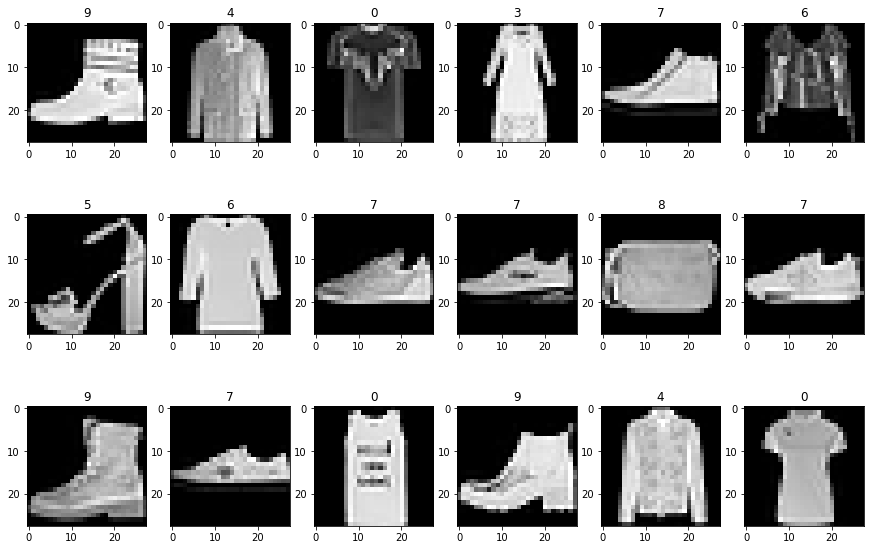

In [3]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1



In [4]:
# Data normalization
#x_train = x_train/255
#_test = x_test/255


img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Prepare the training images
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_train /= 255

# Prepare the test images
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_test = x_test.astype('float32')
x_test /= 255

# Prepare the validation images
x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
x_val = x_val.astype('float32')
x_val /= 255


In [5]:

inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

2022-12-04 22:40:11.985175: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-04 22:40:11.986115: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-04 22:40:12.189059: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-04 22:40:12.189912: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-04 22:40:12.190772: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3211392   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,213,002
Trainable params: 3,213,002
Non-trainable params: 0
_________________________________________________________________


In [6]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [9]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

2022-12-04 11:47:28.700345: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-12-04 11:47:30.075312: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


938/938 [==============================] - 10s 3ms/step - loss: 0.3936 - accuracy: 0.8623 - val_loss: 0.3301 - val_accuracy: 0.8795
Epoch 2/50
938/938 [==============================] - 3s 3ms/step - loss: 0.2703 - accuracy: 0.9041 - val_loss: 0.2947 - val_accuracy: 0.8911
Epoch 3/50
938/938 [==============================] - 3s 3ms/step - loss: 0.2322 - accuracy: 0.9163 - val_loss: 0.2997 - val_accuracy: 0.8938
Epoch 4/50
938/938 [==============================] - 3s 3ms/step - loss: 0.2024 - accuracy: 0.9255 - val_loss: 0.3062 - val_accuracy: 0.8960
Epoch 5/50
938/938 [==============================] - 3s 3ms/step - loss: 0.1795 - accuracy: 0.9346 - val_loss: 0.3103 - val_accuracy: 0.8980
Epoch 6/50
938/938 [==============================] - 3s 4ms/step - loss: 0.1612 - accuracy: 0.9409 - val_loss: 0.3090 - val_accuracy: 0.9000
Epoch 7/50
938/938 [==============================] - 3s 3ms/step - loss: 0.1434 - accuracy: 0.9466 - val_loss: 0.3294 - val_accuracy: 0.8952
Epoch 8/50
938/9

In [ ]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [28]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(512)(net)
net = Dropout(0.2)(net) 
net = Dense(256)(net)
net = Dropout(0.2)(net) 
net = Dense(128)(net)
net = Dropout(0.2)(net) 
net = Dense(64)(net)
net = Dropout(0.2)(net)

outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               12845568  
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0   

In [29]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=[early_stopping])



Epoch 1/50
938/938 [==============================] - 6s 6ms/step - loss: 0.4845 - accuracy: 0.8419 - val_loss: 0.3479 - val_accuracy: 0.8753
Epoch 2/50
938/938 [==============================] - 5s 5ms/step - loss: 0.3089 - accuracy: 0.8917 - val_loss: 0.3302 - val_accuracy: 0.8874
Epoch 3/50
938/938 [==============================] - 5s 5ms/step - loss: 0.2670 - accuracy: 0.9054 - val_loss: 0.3502 - val_accuracy: 0.8847
Epoch 4/50
938/938 [==============================] - 5s 5ms/step - loss: 0.2352 - accuracy: 0.9163 - val_loss: 0.3611 - val_accuracy: 0.8889
Epoch 5/50
938/938 [==============================] - 5s 5ms/step - loss: 0.2171 - accuracy: 0.9220 - val_loss: 0.3494 - val_accuracy: 0.8884
Epoch 6/50
938/938 [==============================] - 5s 5ms/step - loss: 0.1993 - accuracy: 0.9280 - val_loss: 0.3922 - val_accuracy: 0.8841
Epoch 7/50
938/938 [==============================] - 5s 5ms/step - loss: 0.1857 - accuracy: 0.9340 - val_loss: 0.3736 - val_accuracy: 0.8892


Train Acc      0.9340166449546814
Validation Acc 0.88919997215271


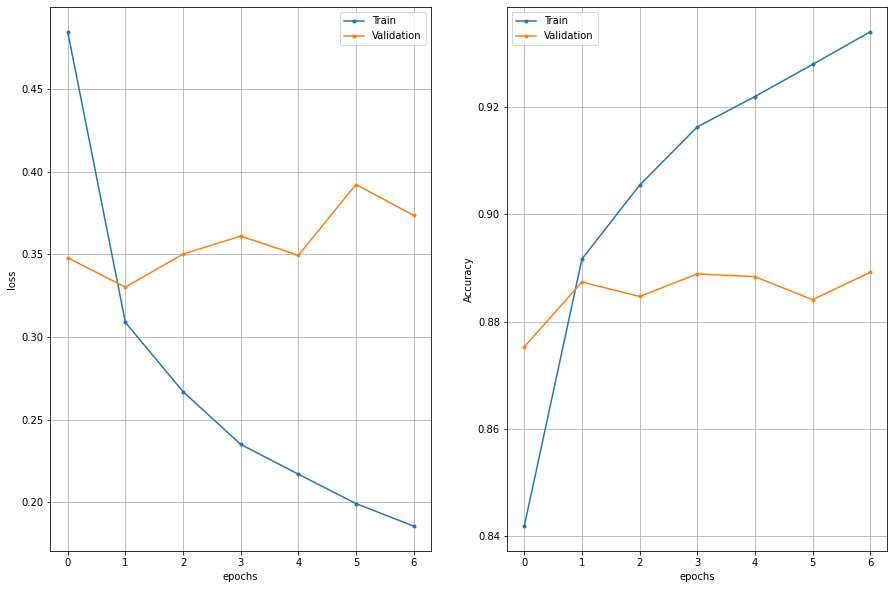

In [30]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3811 - accuracy: 0.8925


In [31]:
inputs = Input(shape=(28, 28, 1))

net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.2)(net)
net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.2)(net)
net = Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.2)(net)
net = Flatten()(net)
net = Dense(64, activation="relu")(net)
net = Dropout(0.5)(net)
outputs = Dense(1, activation="sigmoid")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 7, 64)          0   

In [32]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=[early_stopping])


Epoch 1/50
938/938 [==============================] - 4s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/50
938/938 [==============================] - 4s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/50
938/938 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 4/50
938/938 [==============================] - 4s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 5/50
938/938 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000


In [34]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))


Epoch 1/50
938/938 [==============================] - 4s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/50
938/938 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/50
938/938 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 4/50
938/938 [==============================] - 4s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 5/50
938/938 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 6/50
938/938 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 7/50
938/938 [==============================] - 4s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 8/50
938/938 [============================

Train Acc      0.10000000149011612
Validation Acc 0.10000000149011612


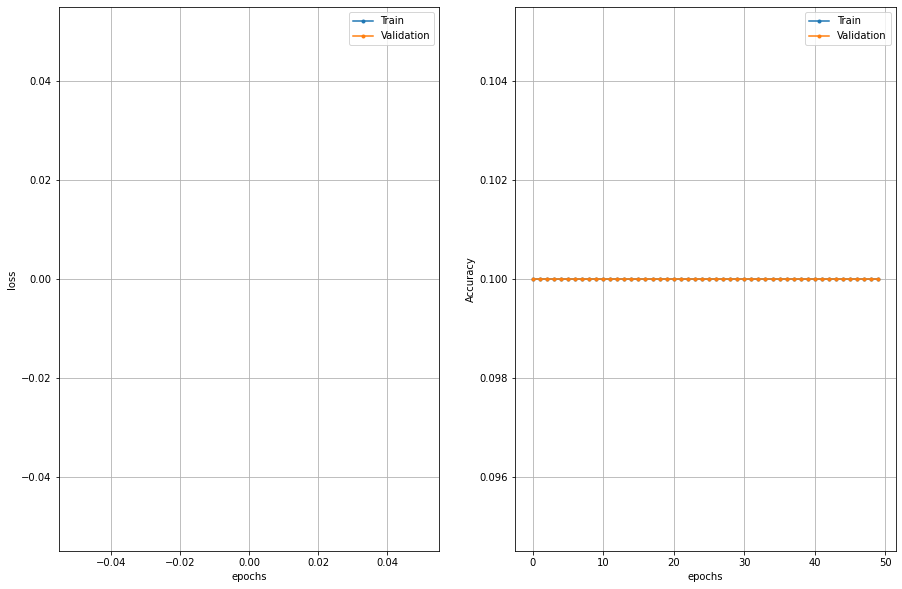

In [36]:
plot_history(history)

Data Augmentation

In [37]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
flatten_4 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               3211392   
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 3,213,002
Trainable params: 3,213,002
Non-trainable params: 0
_________________________________________________________________


In [39]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 5s 4ms/step - loss: 0.3847 - accuracy: 0.8658 - val_loss: 0.3382 - val_accuracy: 0.8777
Epoch 2/50
938/938 [==============================] - 4s 5ms/step - loss: 0.2632 - accuracy: 0.9054 - val_loss: 0.3031 - val_accuracy: 0.8913
Epoch 3/50
938/938 [==============================] - 4s 4ms/step - loss: 0.2225 - accuracy: 0.9192 - val_loss: 0.2913 - val_accuracy: 0.8981
Epoch 4/50
938/938 [==============================] - 4s 4ms/step - loss: 0.1912 - accuracy: 0.9306 - val_loss: 0.3027 - val_accuracy: 0.8977
Epoch 5/50
938/938 [==============================] - 4s 4ms/step - loss: 0.1681 - accuracy: 0.9391 - val_loss: 0.3108 - val_accuracy: 0.9011
Epoch 6/50
938/938 [==============================] - 4s 4ms/step - loss: 0.1502 - accuracy: 0.9456 - val_loss: 0.3164 - val_accuracy: 0.9030
Epoch 7/50
938/938 [==============================] - 4s 4ms/step - loss: 0.1329 - accuracy: 0.9512 - val_loss: 0.3448 - val_accuracy: 0.8941
Epoch 

Train Acc      0.9942166805267334
Validation Acc 0.8902999758720398


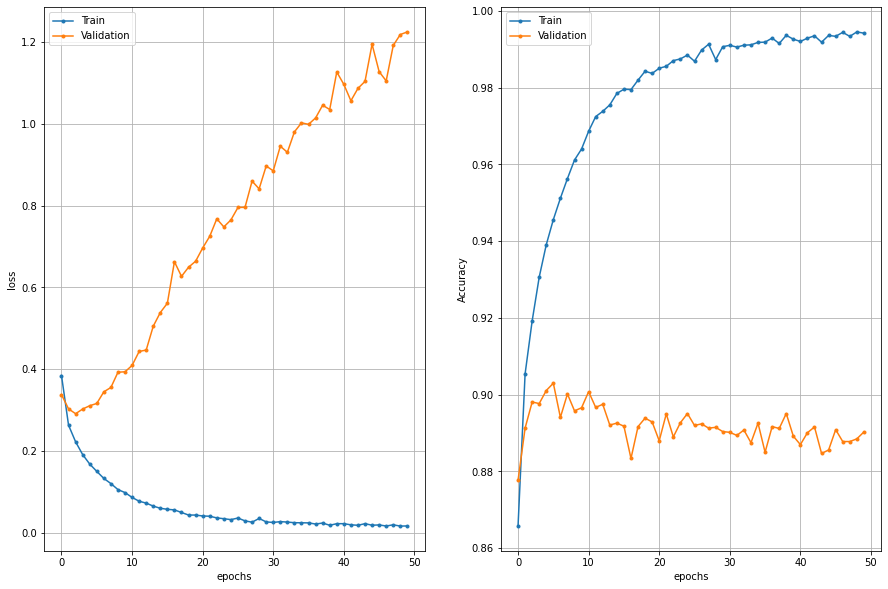

In [40]:
plot_history(history)

In [5]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
            
inputs = Input(shape=(28, 28, 1))

net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = BatchNormalization()(net)
net = Activation("relu")(net)
net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = BatchNormalization()(net)
net = Activation("relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = BatchNormalization()(net)
net = Activation("relu")(net)
net = Conv2D(256, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = BatchNormalization()(net)
net = Activation("relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
net = Dense(256, activation="relu")(net)
net = BatchNormalization()(net)
net = Dropout(0.5)(net)
net = Activation("relu")(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()           
            
            

2022-12-04 17:47:21.802733: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-04 17:47:21.896335: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-04 17:47:21.897136: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-04 17:47:21.898938: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0     

node zero
2022-12-04 17:47:24.048490: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-04 17:47:24.049294: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-04 17:47:24.049998: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-04 17:47:24.050615: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15401 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [ ]:
epochs = 50
batch_size = 64
steps_per_epoch = len(y_train) // batch_size
generator = datagen(x_train, y_train, batch_size)
print(x_train.shape)

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

start = time()
history = model.fit(generator, steps_per_epoch=steps_per_epoch, epochs=epochs, validation_data=(x_test, y_test))
print('Elapsed time', time() - start)

In [51]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 13s 12ms/step - loss: 0.3721 - accuracy: 0.8713 - val_loss: 0.3491 - val_accuracy: 0.8826
Epoch 2/50
938/938 [==============================] - 11s 12ms/step - loss: 0.2405 - accuracy: 0.9146 - val_loss: 0.2381 - val_accuracy: 0.9148
Epoch 3/50
938/938 [==============================] - 11s 12ms/step - loss: 0.2001 - accuracy: 0.9276 - val_loss: 0.2431 - val_accuracy: 0.9142
Epoch 4/50
938/938 [==============================] - 11s 11ms/step - loss: 0.1730 - accuracy: 0.9370 - val_loss: 0.2328 - val_accuracy: 0.9171
Epoch 5/50
938/938 [==============================] - 11s 12ms/step - loss: 0.1508 - accuracy: 0.9446 - val_loss: 0.2161 - val_accuracy: 0.9254
Epoch 6/50
938/938 [==============================] - 11s 11ms/step - loss: 0.1297 - accuracy: 0.9531 - val_loss: 0.2155 - val_accuracy: 0.9239
Epoch 7/50
938/938 [==============================] - 11s 11ms/step - loss: 0.1097 - accuracy: 0.9593 - val_loss: 0.2150 - val_accuracy:

Train Acc      0.996483325958252
Validation Acc 0.9312000274658203


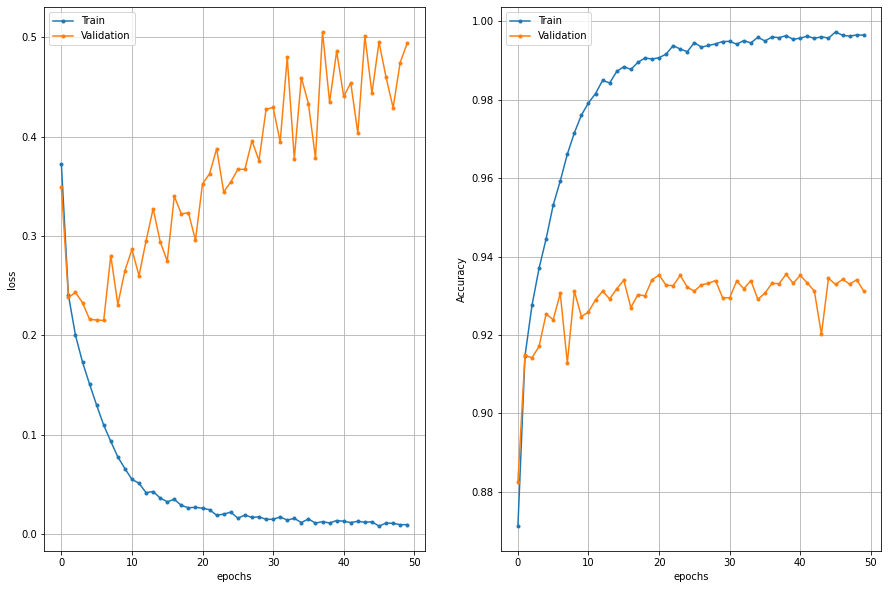

In [52]:
plot_history(history)

In [15]:

from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(x_train, y_train, batch_size=256)
val_batches = gen.flow(x_test, y_test, batch_size=256)

In [17]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

history3 = model.fit_generator(batches, steps_per_epoch=48000//256, epochs=50,
                    validation_data=val_batches, validation_steps=12000//256, use_multiprocessing=True)


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3211392   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 3,213,002
Trainable params: 3,213,002
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


2022-12-04 22:18:25.757473: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-12-04 22:18:27.372881: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


187/187 [==============================] - 21s 73ms/step - loss: 1.2885 - accuracy: 0.5664 - val_loss: 0.8461 - val_accuracy: 0.6926
Epoch 2/50
187/187 [==============================] - 17s 89ms/step - loss: 0.7883 - accuracy: 0.7089 - val_loss: 0.7714 - val_accuracy: 0.7160
Epoch 3/50
187/187 [==============================] - 14s 73ms/step - loss: 0.7324 - accuracy: 0.7289 - val_loss: 0.7334 - val_accuracy: 0.7249
Epoch 4/50
187/187 [==============================] - 16s 87ms/step - loss: 0.7051 - accuracy: 0.7413 - val_loss: 0.7289 - val_accuracy: 0.7329
Epoch 5/50
187/187 [==============================] - 16s 85ms/step - loss: 0.6871 - accuracy: 0.7471 - val_loss: 0.7086 - val_accuracy: 0.7371
Epoch 6/50
187/187 [==============================] - 17s 89ms/step - loss: 0.6729 - accuracy: 0.7548 - val_loss: 0.7108 - val_accuracy: 0.7325
Epoch 7/50
187/187 [==============================] - 16s 86ms/step - loss: 0.6610 - accuracy: 0.7592 - val_loss: 0.6799 - val_accuracy: 0.7460
Epo

In [7]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

2022-12-04 22:42:24.396506: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-12-04 22:42:26.393485: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


750/750 [==============================] - 13s 5ms/step - loss: 0.4109 - accuracy: 0.8581 - val_loss: 0.3385 - val_accuracy: 0.8790
Epoch 2/50
750/750 [==============================] - 4s 5ms/step - loss: 0.2734 - accuracy: 0.9016 - val_loss: 0.3070 - val_accuracy: 0.8893
Epoch 3/50
750/750 [==============================] - 4s 5ms/step - loss: 0.2319 - accuracy: 0.9161 - val_loss: 0.2980 - val_accuracy: 0.8954
Epoch 4/50
750/750 [==============================] - 4s 5ms/step - loss: 0.2038 - accuracy: 0.9264 - val_loss: 0.3046 - val_accuracy: 0.8927
Epoch 5/50
750/750 [==============================] - 4s 6ms/step - loss: 0.1793 - accuracy: 0.9349 - val_loss: 0.3095 - val_accuracy: 0.8955
Epoch 6/50
750/750 [==============================] - 4s 5ms/step - loss: 0.1604 - accuracy: 0.9419 - val_loss: 0.3161 - val_accuracy: 0.8985
Epoch 7/50
750/750 [==============================] - 4s 5ms/step - loss: 0.1430 - accuracy: 0.9473 - val_loss: 0.3289 - val_accuracy: 0.8965
Epoch 8/50
750/7

In [12]:
inputs = Input(shape=(28, 28, 1))

net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.25)(net)

net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.25)(net)

net = Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = Dropout(0.4)(net)

net = Flatten()(net)

net = Dense(128, activation="relu")(net)
net = Dropout(0.3)(net)
outputs = Dense(10, activation="sigmoid")(net)

model = Model(inputs, outputs)
model.summary()    

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 64)          0   

In [13]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
750/750 [==============================] - 4s 4ms/step - loss: 0.5462 - accuracy: 0.7999 - val_loss: 0.3620 - val_accuracy: 0.8696
Epoch 2/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3577 - accuracy: 0.8695 - val_loss: 0.3031 - val_accuracy: 0.8886
Epoch 3/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3144 - accuracy: 0.8846 - val_loss: 0.2951 - val_accuracy: 0.8937
Epoch 4/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2884 - accuracy: 0.8929 - val_loss: 0.2578 - val_accuracy: 0.9036
Epoch 5/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2684 - accuracy: 0.8992 - val_loss: 0.2575 - val_accuracy: 0.9054
Epoch 6/50
750/750 [==============================] - 3s 5ms/step - loss: 0.2534 - accuracy: 0.9051 - val_loss: 0.2455 - val_accuracy: 0.9079
Epoch 7/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2436 - accuracy: 0.9097 - val_loss: 0.2422 - val_accuracy: 0.9088
Epoch 

Train Acc      0.9511874914169312
Validation Acc 0.9240999817848206


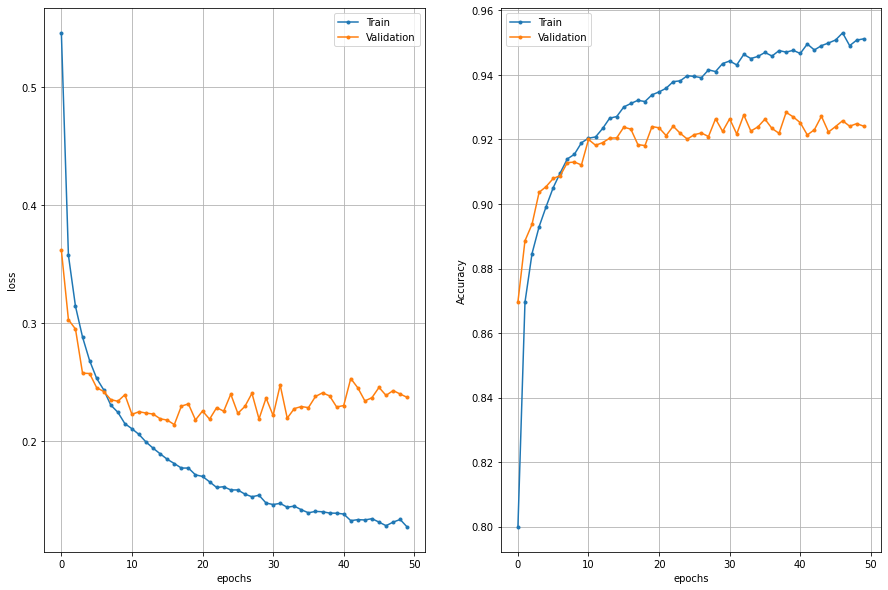

In [17]:
plot_history(history)

Let's work with the same successful model but with data augmentation

In [18]:

from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)

batches = gen.flow(x_train, y_train, batch_size=256)
val_batches = gen.flow(x_test, y_test, batch_size=256)



epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

history3 = model.fit_generator(batches, steps_per_epoch=48000//256, epochs=50,
                    validation_data=val_batches, validation_steps=12000//256, use_multiprocessing=True)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
187/187 [==============================] - 17s 83ms/step - loss: 0.4718 - accuracy: 0.8332 - val_loss: 0.3596 - val_accuracy: 0.8716
Epoch 2/50
187/187 [==============================] - 18s 98ms/step - loss: 0.3969 - accuracy: 0.8564 - val_loss: 0.3279 - val_accuracy: 0.8759
Epoch 3/50
187/187 [==============================] - 15s 82ms/step - loss: 0.3690 - accuracy: 0.8647 - val_loss: 0.3348 - val_accuracy: 0.8727
Epoch 4/50
187/187 [==============================] - 17s 93ms/step - loss: 0.3494 - accuracy: 0.8718 - val_loss: 0.3060 - val_accuracy: 0.8900
Epoch 5/50
187/187 [==============================] - 16s 85ms/step - loss: 0.3367 - accuracy: 0.8737 - val_loss: 0.2972 - val_accuracy: 0.8923
Epoch 6/50
187/187 [==============================] - 18s 94ms/step - loss: 0.3318 - accuracy: 0.8772 - val_loss: 0.2958 - val_accuracy: 0.8916
Epoch 7/50
187/187 [==============================] - 18s 97ms/step - loss: 0.3264 - accuracy: 0.8791 - val_loss: 0.2888 - val_accuracy:

Train Acc      0.9511874914169312
Validation Acc 0.9240999817848206


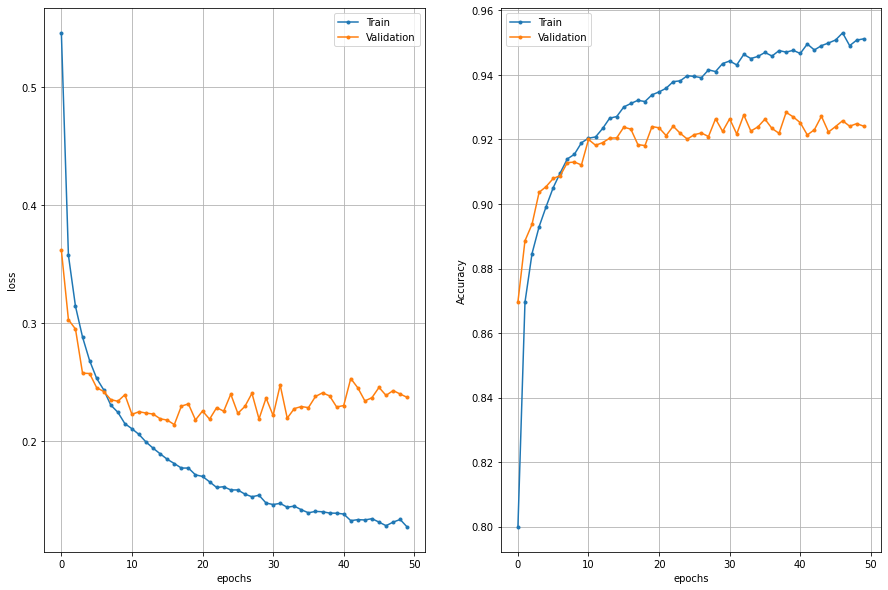

In [19]:
plot_history(history)

# More simple augmentation

Epoch 1/50
187/187 [==============================] - 4s 17ms/step - loss: 0.3166 - accuracy: 0.8987 - val_loss: 0.2194 - val_accuracy: 0.9225
Epoch 2/50
187/187 [==============================] - 3s 16ms/step - loss: 0.2142 - accuracy: 0.9211 - val_loss: 0.2110 - val_accuracy: 0.9248
Epoch 3/50
187/187 [==============================] - 3s 15ms/step - loss: 0.1967 - accuracy: 0.9279 - val_loss: 0.2032 - val_accuracy: 0.9284
Epoch 4/50
187/187 [==============================] - 3s 18ms/step - loss: 0.1893 - accuracy: 0.9293 - val_loss: 0.1985 - val_accuracy: 0.9313
Epoch 5/50
187/187 [==============================] - 3s 15ms/step - loss: 0.1815 - accuracy: 0.9329 - val_loss: 0.1939 - val_accuracy: 0.9333
Epoch 6/50
187/187 [==============================] - 3s 15ms/step - loss: 0.1726 - accuracy: 0.9355 - val_loss: 0.2018 - val_accuracy: 0.9277
Epoch 7/50
187/187 [==============================] - 3s 16ms/step - loss: 0.1731 - accuracy: 0.9363 - val_loss: 0.2011 - val_accuracy: 0.9284

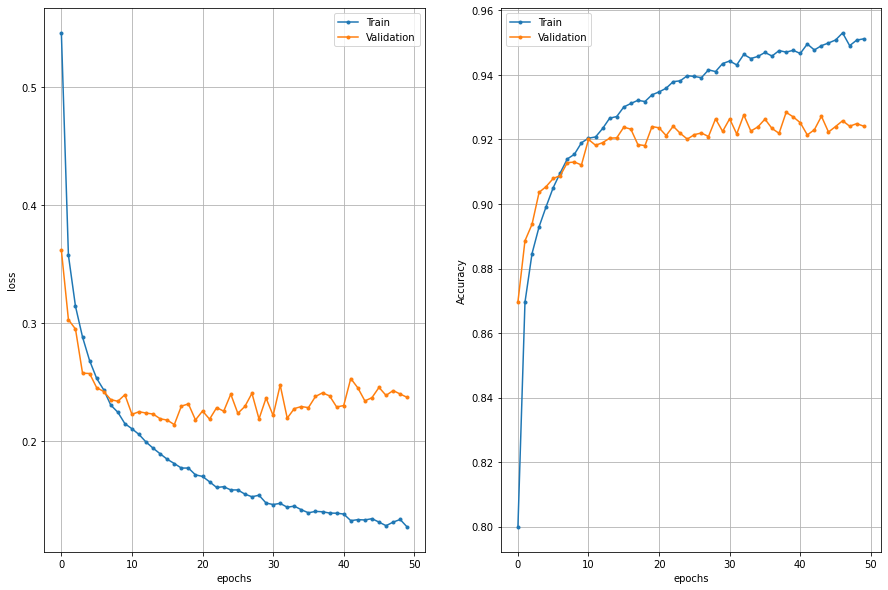

In [20]:
from keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(horizontal_flip=True)


batches = gen.flow(x_train, y_train, batch_size=256)
val_batches = gen.flow(x_test, y_test, batch_size=256)



epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

history3 = model.fit_generator(batches, steps_per_epoch=48000//256, epochs=50,
                    validation_data=val_batches, validation_steps=12000//256, use_multiprocessing=True)
plot_history(history)


#### Cool! Let's return to one of our previous pretty difficult model and try again with horizontal flip

In [21]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
            
inputs = Input(shape=(28, 28, 1))

net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = BatchNormalization()(net)
net = Activation("relu")(net)
net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = BatchNormalization()(net)
net = Activation("relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = BatchNormalization()(net)
net = Activation("relu")(net)
net = Conv2D(256, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = BatchNormalization()(net)
net = Activation("relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
net = Dense(256, activation="relu")(net)
net = BatchNormalization()(net)
net = Dropout(0.5)(net)
net = Activation("relu")(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0   

Epoch 1/50
187/187 [==============================] - 13s 54ms/step - loss: 0.4210 - accuracy: 0.8559 - val_loss: 2.3028 - val_accuracy: 0.1001
Epoch 2/50
187/187 [==============================] - 10s 52ms/step - loss: 0.2568 - accuracy: 0.9096 - val_loss: 2.2518 - val_accuracy: 0.3128
Epoch 3/50
187/187 [==============================] - 9s 50ms/step - loss: 0.2117 - accuracy: 0.9237 - val_loss: 0.4702 - val_accuracy: 0.9067
Epoch 4/50
187/187 [==============================] - 9s 49ms/step - loss: 0.1854 - accuracy: 0.9334 - val_loss: 0.2436 - val_accuracy: 0.9090
Epoch 5/50
187/187 [==============================] - 10s 52ms/step - loss: 0.1640 - accuracy: 0.9400 - val_loss: 0.2251 - val_accuracy: 0.9205
Epoch 6/50
187/187 [==============================] - 10s 52ms/step - loss: 0.1516 - accuracy: 0.9457 - val_loss: 0.2550 - val_accuracy: 0.9145
Epoch 7/50
187/187 [==============================] - 9s 49ms/step - loss: 0.1368 - accuracy: 0.9497 - val_loss: 0.2182 - val_accuracy: 0.

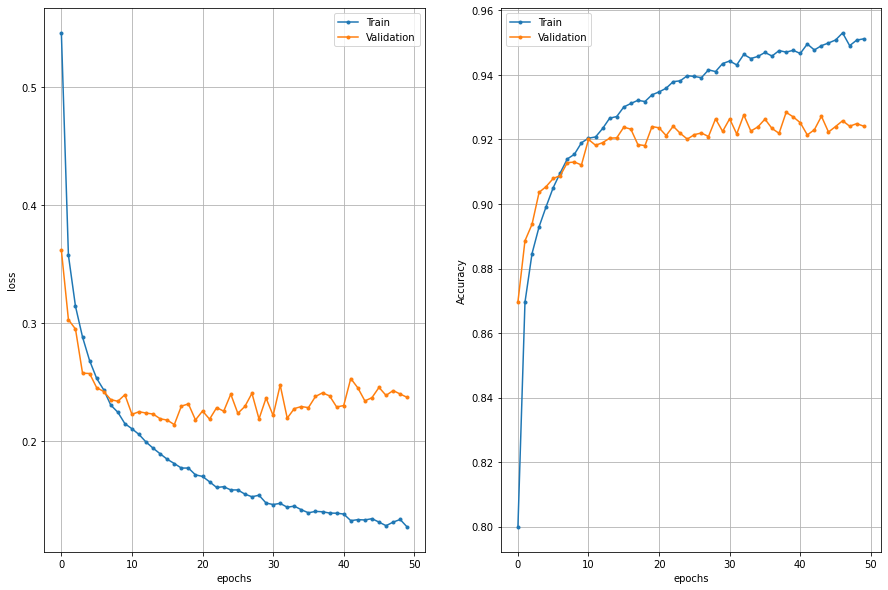

In [22]:
from keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(horizontal_flip=True)


batches = gen.flow(x_train, y_train, batch_size=256)
val_batches = gen.flow(x_test, y_test, batch_size=256)



epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

history3 = model.fit_generator(batches, steps_per_epoch=48000//256, epochs=50,
                    validation_data=val_batches, validation_steps=12000//256, use_multiprocessing=True)
plot_history(history)

#### Let's add early stopping with default parameters patience=0

Epoch 1/50
187/187 [==============================] - 12s 53ms/step - loss: 0.0178 - accuracy: 0.9941 - val_loss: 0.4322 - val_accuracy: 0.9325
Train Acc      0.9511874914169312
Validation Acc 0.9240999817848206


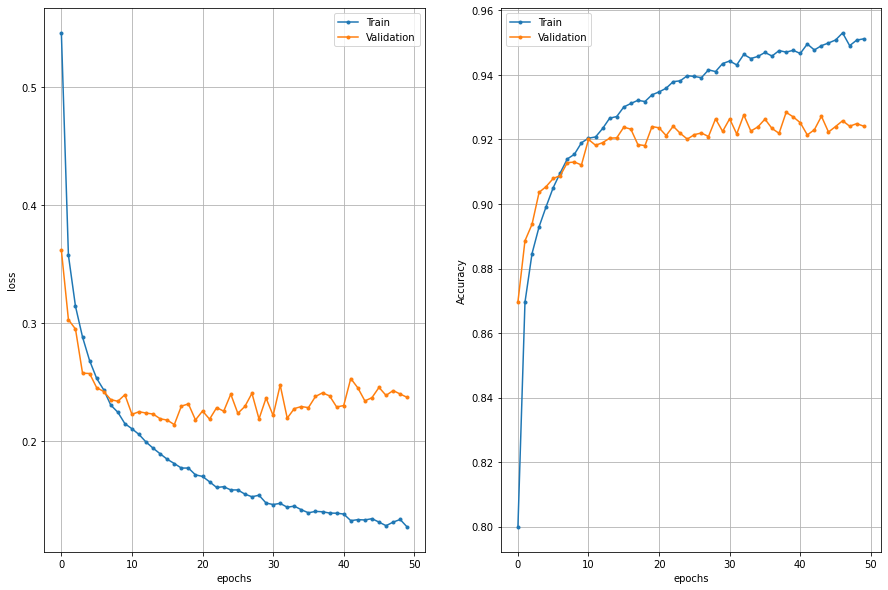

In [25]:
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()

gen = ImageDataGenerator(horizontal_flip=True)


batches = gen.flow(x_train, y_train, batch_size=256)
val_batches = gen.flow(x_test, y_test, batch_size=256)



epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

history3 = model.fit_generator(batches, steps_per_epoch=48000//256, epochs=50,
                    validation_data=val_batches, validation_steps=12000//256, callbacks=[early_stopping], use_multiprocessing=True)
plot_history(history)

### Questions

### What have you done in order to improve the performance?
* -Dropout
* -Batch normalization
* -Weight regularization
* -Data augmentation
* -Early stopping
### Have you tried configurations that did not work out?
#### -Heavy data augmentation for this dataset does not really help; horizontal flipping helped to achieve 92-93% validation accuracy.

#### Validation Acc 92-93%